# KDD Data Analysis and Attack Classification using Machine Learning & Neural Networks
This notebook covers data preprocessing, feature engineering, and training multiple ML models to classify attacks using the KDD dataset.

In [ ]:

import pandas as pd  # Importing pandas for data handling
import numpy as np  # Importing numpy for numerical operations
import seaborn as sns  # Importing seaborn for visualization
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs
from sklearn.model_selection import train_test_split  # Splitting dataset into train and test
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Encoding categorical variables and scaling data
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Importing classification models
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow import keras  # Keras API for building models
from tensorflow.keras.models import Sequential  # Sequential model type
from tensorflow.keras.layers import Dense, Dropout  # Neural network layers


## Load the KDD dataset from URL

In [ ]:

# Load KDD dataset from URL
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
             "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
             "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
             "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
             "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
             "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv(url, names=col_names, compression='gzip')

df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
# prompt: sample 5000 rows to make training faster

# Sample 5000 rows from the DataFrame
df = df.sample(n=5000, random_state=42)  # Use random_state for reproducibility

# Now df_sampled contains your sampled data
df.shape


(5000, 42)

## Data Preprocessing & Feature Engineering

In [ ]:

# Encoding categorical variables into numeric form
encoder = LabelEncoder()
categorical_columns = ['protocol_type', 'service', 'flag']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Convert labels into binary classification (attack or normal)
df['label'] = df['label'].apply(lambda x: 'normal' if x == 'normal.' else 'attack')
df['label'] = encoder.fit_transform(df['label'])

# Feature Engineering: Creating new features
df['byte_ratio'] = df['src_bytes'] / (df['dst_bytes'] + 1)
df['total_count'] = df['count'] + df['srv_count']
df['error_rate'] = (df['serror_rate'] + df['rerror_rate']) / 2

df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,byte_ratio,total_count,error_rate
317921,0,0,13,6,1032,0,0,0,0,0,...,1.00,0.00,0.0,0.0,0.0,0.0,0,1032.000000,1022,0.0
171422,0,0,13,6,1032,0,0,0,0,0,...,1.00,0.00,0.0,0.0,0.0,0.0,0,1032.000000,1022,0.0
312181,0,0,13,6,1032,0,0,0,0,0,...,1.00,0.00,0.0,0.0,0.0,0.0,0,1032.000000,1022,0.0
87346,0,1,18,6,345,5419,0,0,0,0,...,0.01,0.02,0.0,0.0,0.0,0.0,1,0.063653,12,0.0
57449,0,1,31,3,0,0,0,0,0,0,...,0.00,0.00,1.0,1.0,0.0,0.0,0,0.000000,262,0.5


## Splitting Data into Training and Testing Sets

In [ ]:

X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Training Machine Learning Models
Random Forest Classifiers:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Gradient Boosting Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Support Vector Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#

In [ ]:

# RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Random Forest Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       0.98      1.00      0.99       192

    accuracy                           1.00      1000
   macro avg       0.99      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Gradient Boosting Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       0.98      1.00      0.99       192

    accuracy                           1.00      1000
   macro avg       0.99      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

SVM Accuracy: 0.994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       0.98      0.98      0.98       192

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99 

## Building a Neural Network Classifier

In [ ]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8444 - loss: 0.4102 - val_accuracy: 0.9920 - val_loss: 0.0457
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9743 - loss: 0.1331 - val_accuracy: 0.9950 - val_loss: 0.0394
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0605 - val_accuracy: 0.9950 - val_loss: 0.0461
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0619 - val_accuracy: 0.9950 - val_loss: 0.0565
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9941 - loss: 0.0285 - val_accuracy: 0.9950 - val_loss: 0.0607
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0375 - val_accuracy: 0.9960 - val_loss: 0.0627
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9919 - loss: 0.0265 - val_accuracy: 0.9960 - val_loss: 0.0650
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9963 - loss: 0.0227 - val_accuracy: 0.

## Evaluating Neural Network Performance

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       0.98      0.99      0.99       192

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000



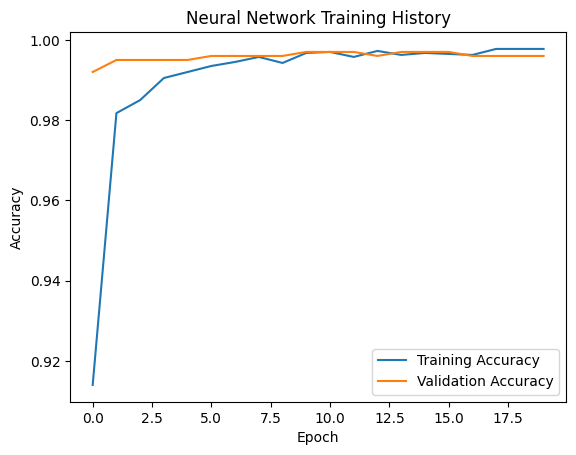

In [ ]:

y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Neural Network Training History')
plt.show()


Based on the above code, write your own code to develop other ML or Neural network algorithms from list below.

Machine Learning Algorithms
**bold text**
Decision Tree Classifier:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

K-Nearest Neighbors (KNN):  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Naive Bayes Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html


**Deep Learning Models**
Long Short-Term Memory (LSTM): https://keras.io/api/layers/recurrent_layers/lstm/

Convolutional Neural Networks (CNN): https://keras.io/api/layers/convolution_layers/convolution1d/

Transformers (Hugging Face Transformers)

**Important: Lab-Logbbok requirement**

Provide a bar graph comparing accuracy, precicion, recall, and f-score for various AI models



In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten

In [ ]:
# Load dataset
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
             "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
             "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
             "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
             "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
             "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
             "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
             "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv(url, names=col_names, compression='gzip')

In [ ]:
# Sample 5000 rows for faster training
df = df.sample(n=5000, random_state=42)

# Encoding categorical variables
encoder = LabelEncoder()
categorical_columns = ['protocol_type', 'service', 'flag']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Convert labels into binary classification (attack or normal)
df['label'] = df['label'].apply(lambda x: 'normal' if x == 'normal.' else 'attack')
df['label'] = encoder.fit_transform(df['label'])

# Splitting data into training and test sets
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Dictionary to store model performances
ml_results = {}

In [ ]:
# 1️⃣ Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
ml_results["Decision Tree"] = classification_report(y_test, y_pred_dt, output_dict=True)

In [ ]:
# 2️⃣ K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
ml_results["KNN"] = classification_report(y_test, y_pred_knn, output_dict=True)

In [ ]:
# 3️⃣ Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
ml_results["Logistic Regression"] = classification_report(y_test, y_pred_lr, output_dict=True)


In [ ]:
# 4️⃣ Naïve Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
ml_results["Naïve Bayes"] = classification_report(y_test, y_pred_nb, output_dict=True)

In [ ]:
# Reshape data for LSTM and CNN models
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 5️⃣ LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)
y_pred_lstm = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")
ml_results["LSTM"] = classification_report(y_test, y_pred_lstm, output_dict=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8709 - loss: 0.3980 - val_accuracy: 0.9830 - val_loss: 0.0540
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9774 - loss: 0.0680 - val_accuracy: 0.9890 - val_loss: 0.0511
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9819 - loss: 0.0609 - val_accuracy: 0.9810 - val_loss: 0.0759
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9812 - loss: 0.0710 - val_accuracy: 0.9820 - val_loss: 0.0560
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9828 - loss: 0.0559 - val_accuracy: 0.9890 - val_loss: 0.0383
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [ ]:
# 6️⃣ CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)
y_pred_cnn = (cnn_model.predict(X_test_reshaped) > 0.5).astype("int32")
ml_results["CNN"] = classification_report(y_test, y_pred_cnn, output_dict=True)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9338 - loss: 0.2165 - val_accuracy: 0.9950 - val_loss: 0.0365
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9951 - loss: 0.0169 - val_accuracy: 0.9950 - val_loss: 0.0471
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9974 - loss: 0.0104 - val_accuracy: 0.9940 - val_loss: 0.0611
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9976 - loss: 0.0104 - val_accuracy: 0.9960 - val_loss: 0.0650
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9978 - loss: 0.0110 - val_accuracy: 0.9950 - val_loss: 0.0557
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


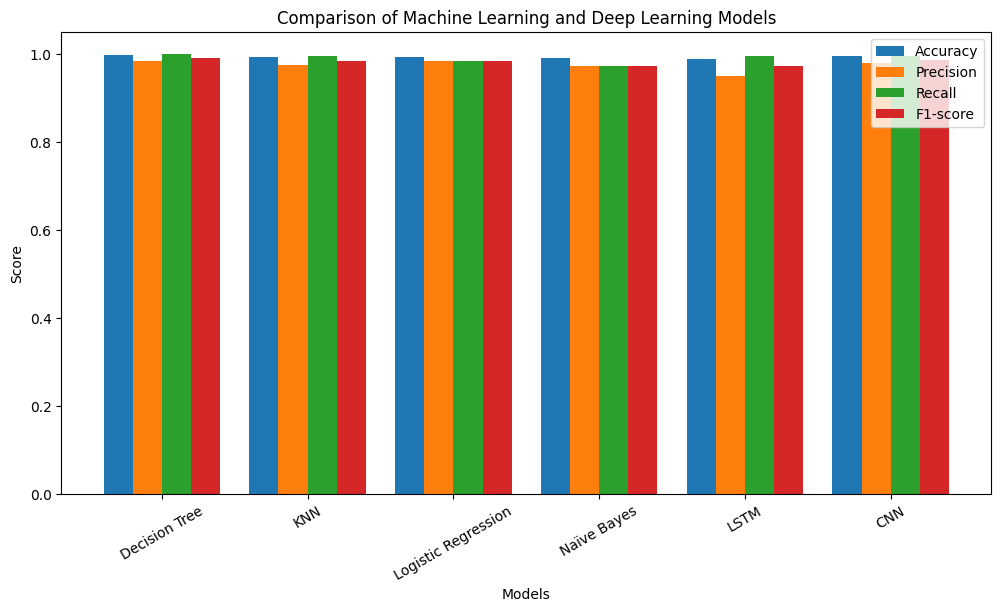

In [ ]:
import numpy as np

# Extract accuracy, precision, recall, f1-score
models = list(ml_results.keys())
accuracy = [ml_results[m]["accuracy"] for m in models]
precision = [ml_results[m]["1"]["precision"] for m in models]
recall = [ml_results[m]["1"]["recall"] for m in models]
f1_score = [ml_results[m]["1"]["f1-score"] for m in models]

# Plot bar chart
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5 * width, accuracy, width, label="Accuracy")
ax.bar(x - 0.5 * width, precision, width, label="Precision")
ax.bar(x + 0.5 * width, recall, width, label="Recall")
ax.bar(x + 1.5 * width, f1_score, width, label="F1-score")

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Comparison of Machine Learning and Deep Learning Models")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30)
ax.legend()

plt.show()